# Titanic

import some modules and datasets

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os


%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')
print(os.listdir("./data"))

['.DS_Store', 'test.csv', 'train.csv', 'gender_submission.csv']


## Read Datasets from csv

In [14]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
print("train's shape:", str(train.shape))
print(train.info())
train.sample(5)

train's shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
663,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S


In [20]:
print("test's shape:", str(test.shape))
print(test.info())
test.sample(5)

test's shape: (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
160,1052,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q
110,1002,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,NaN,C
168,1060,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C
162,1054,2,"Wright, Miss. Marion",female,26.0,0,0,220844,13.5000,NaN,S
180,1072,2,"McCrie, Mr. James Matthew",male,30.0,0,0,233478,13.0000,NaN,S


## Dealing with Missing Values

In [37]:
# in train data
total = train.isnull().sum().sort_values(ascending=False)
percent = round(total/len(train)*100, 2)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [38]:
# in test data
total = test.isnull().sum().sort_values(ascending=False)
percent = round(total/len(test)*100, 2)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


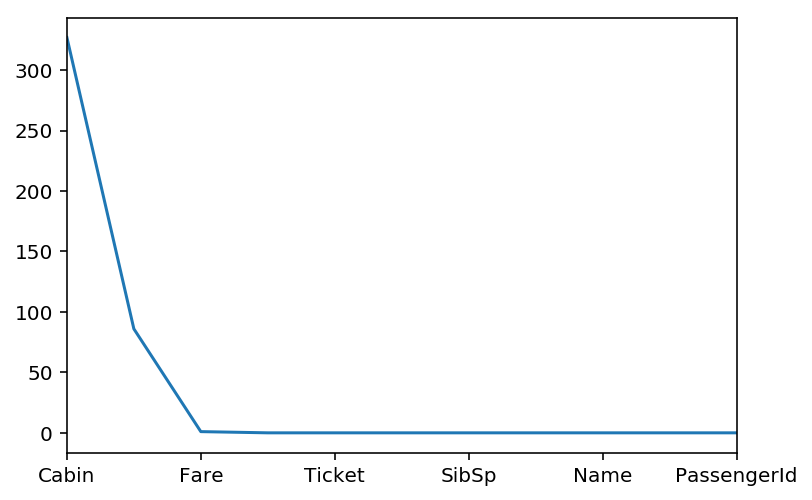

In [39]:
total.plot()